# 🔎 Análisis exploratorio del dataset Madrid Polution (2001- 2022)

Este proyecto utiliza el dataset “MadridPolution2001-2022.csv”, que contiene registros horarios de contaminantes atmosféricos medidos en la estación Escuelas Aguirre (Madrid) desde enero de 2001 hasta marzo de 2022. El objetivo principal es analizar la evolución de la calidad del aire en Madrid, identificando tendencias, picos y patrones estacionales en los principales contaminantes.

El dataset incluye las siguientes variables:
- **BEN**: Benceno (µg/m³)
- **CH4**: Metano (mg/m³)
- **CO**: Monóxido de carbono (mg/m³)
- **EBE**: Etilbenceno (µg/m³)
- **NMHC**: Hidrocarburos no metánicos (mg/m³)
- **NO**: Monóxido de nitrógeno (µg/m³)
- **NO2**: Dióxido de nitrógeno (µg/m³)
- **NOx**: Óxidos de nitrógeno (µg/m³)
- **O3**: Ozono (µg/m³)
- **PM10**: Partículas < 10 µm (µg/m³)
- **PM25**: Partículas < 2.5 µm (µg/m³)
- **SO2**: Dióxido de azufre (µg/m³)
- **TCH**: Hidrocarburos totales (mg/m³)
- **TOL**: Tolueno (µg/m³)

El análisis se centra en la evolución temporal, la comparación entre contaminantes y la identificación de patrones estacionales y extremos.

## 🌱 Alba (limpieza y calidad de datos)

Convertimos la columna Time, originalmente en formato string, a tipo datetime para asegurar consistencia temporal y permitir análisis por fecha y hora. También creamos nuevas columnas (year, month, day, hour) a partir de la columna de fecha para facilitar el análisis exploratorio por periodos de tiempo.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Cargar el dataset
csv_path = r"data/MadridPolution2001-2022.csv"

# Leer sin parsear fechas inicialmente para detectar el nombre de columna correcto
df = pd.read_csv(csv_path)

# --- LIMPIEZA DE FECHA ---
# La columna "time" la convertimos directamente a datetime
df["Time"] = pd.to_datetime(df["Time"], errors="coerce") # Con errors="coerce"

# Verificamos si se han generado nulos al convertir la columna "Time" a formato datetime
print("Nulos en la columna Time después de la conversión: ", df["Time"].isna().sum())

# Creamos columnas auxiliares para explorar temporalmente el dataset, pero de momento no haremos una limpieza estricta
df["year"] = df["Time"].dt.year
df["month"] = df["Time"].dt.month
df["day"] = df["Time"].dt.day
df["hour"] = df["Time"].dt.hour


# Mostramos los resultados
print("Columnas detectadas en el CSV:", df.columns.tolist())
print("Dimensiones del dataset:", df.shape)
print(df.head(10))

Nulos en la columna Time después de la conversión:  0
Columnas detectadas en el CSV: ['Time', 'BEN', 'CH4', 'CO', 'EBE', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM25', 'SO2', 'TCH', 'TOL', 'year', 'month', 'day', 'hour']
Dimensiones del dataset: (172622, 19)
                       Time   BEN  CH4   CO  EBE  NMHC     NO   NO2    NOx  \
0 2001-01-01 00:00:00+00:00   4.0  NaN  0.0  2.0   NaN   66.0  67.0  168.0   
1 2001-01-01 01:00:00+00:00   9.0  NaN  0.0  5.0   NaN  146.0  71.0  294.0   
2 2001-01-01 02:00:00+00:00   9.0  NaN  0.0  5.0   NaN  190.0  73.0  364.0   
3 2001-01-01 03:00:00+00:00  10.0  NaN  0.0  5.0   NaN  170.0  75.0  335.0   
4 2001-01-01 04:00:00+00:00   8.0  NaN  0.0  4.0   NaN  102.0  67.0  224.0   
5 2001-01-01 05:00:00+00:00   3.0  NaN  1.0  2.0   NaN   63.0  60.0  157.0   
6 2001-01-01 06:00:00+00:00   2.0  NaN  0.0  1.0   NaN   28.0  47.0   90.0   
7 2001-01-01 07:00:00+00:00   2.0  NaN  1.0  1.0   NaN   33.0  43.0   93.0   
8 2001-01-01 08:00:00+00:00   2.0  N

Analizamos la presencia de valores nulos en todas las columnas y calculamos su porcentaje respecto al total de filas, identificando aquellas variables con mayor pérdida de información

In [17]:
# Contamos la cantidad de nulos que hay en cada columna
total_filas = len(df)

nulos_por_columna = df.isnull().sum()

conteo_de_nulos = nulos_por_columna.to_frame("Nulos").assign(Porcentaje=lambda x: (x["Nulos"] / total_filas * 100).round(2)).sort_values("Nulos", ascending=False)

print("--- Cantidad total de nulos en cada columna y porcentaje---")
print(conteo_de_nulos)

--- Cantidad total de nulos en cada columna y porcentaje---
       Nulos  Porcentaje
PM25   66570       38.56
NMHC   32649       18.91
TCH    32571       18.87
CH4    32569       18.87
TOL     8139        4.71
EBE     7835        4.54
BEN     7772        4.50
PM10    4393        2.54
O3      1725        1.00
SO2      767        0.44
NO       706        0.41
NOx      704        0.41
NO2      700        0.41
CO       435        0.25
month      0        0.00
day        0        0.00
Time       0        0.00
year       0        0.00
hour       0        0.00


Añadimos un gráfico de barras para poder representar de forma más visual cuales son las columnas que tienen una mayor cantidad de nulos en sus filas

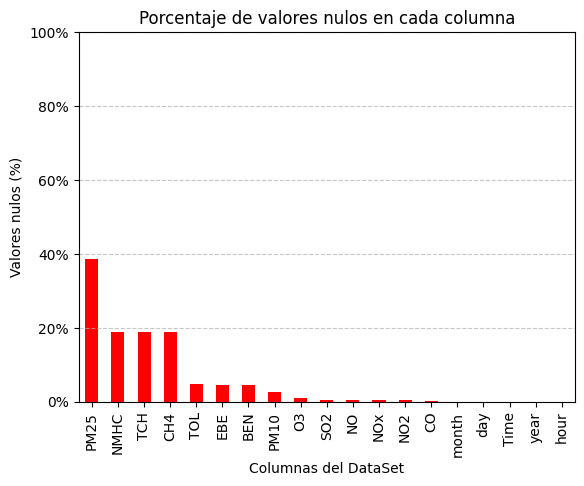

In [18]:
conteo_de_nulos['Porcentaje'].plot(kind="bar", color='red', legend=False)
plt.title("Porcentaje de valores nulos en cada columna")
plt.xlabel("Columnas del DataSet")
plt.ylabel("Valores nulos (%)")

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.ylim(0, 100)
ejes = plt.gca()
ejes.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f'{int(y)}%'))
plt.show()

Determinamos qué variables presentan problemas de calidad de datos debido a la alta proporción de valores ausentes, lo que afecta la representatividad de las mediciones y debe considerarse en futuros análisis.

Comprobamos la existencia de filas duplicadas en el dataset y evaluamos su impacto, eliminándolas en caso de ser necesario para evitar sesgos en el análisis.

Revisamos los tipos de datos de cada columna para asegurar que las variables numéricas se encuentren en formato correcto (float/int) y no en formato texto, evitando errores en el procesamiento posterior.

Analizamos si existen valores anómalos o fuera de rango en las variables (ej. concentraciones negativas o valores extremadamente altos) para garantizar la coherencia de las mediciones.

## 📊 Robert (análisis general y descriptivo)

- Promedio anual: ¿Cuál es la concentración media de cada contaminante por año? (tabla resumen por año y contaminante).
- Mejora: Visualizar la evolución anual de los principales contaminantes con gráficos de líneas.


- Mes con peor calidad del aire: ¿Qué mes tuvo la media más alta de NO₂ cada año? (gráfico de barras mensual por año).
- Mejora: Mostrar el mes más crítico para cada año y visualizar la tendencia mensual agregada.

- Distribución de O₃: ¿Cuál es el rango de concentraciones de O₃ más frecuente? (histograma global y por año).
- Mejora: Analizar la variabilidad anual y estacional de O₃.

- Picos diarios: ¿Qué día presentó la concentración más alta de PM10 en cada año?
- Mejora: Visualizar los días de picos extremos y analizar si hay patrones estacionales o de eventos puntuales.

## 🌍 David (comparaciones y correlaciones)

- Estacionalidad en un año: ¿Qué contaminante presenta mayores diferencias entre invierno y verano?
- Mejora: Analizar la estacionalidad de todos los contaminantes y visualizar la diferencia entre estaciones.

                BEN       CH4        CO       EBE      NMHC         NO  \
estacion                                                                 
Invierno   0.785403  1.006467  0.174652  0.889822  0.003263  67.708046   
Otoño      0.463390  0.994213  0.087596  0.877079  0.003495  46.922874   
Primavera  0.377819  1.000200  0.054342  0.621792  0.000886  28.363833   
Verano     0.205852  1.000910  0.025162  0.645492  0.001195  19.942522   

                 NO2         NOx         O3       PM10       PM25        SO2  \
estacion                                                                       
Invierno   64.797898  168.609213  20.314025  25.232629  12.344791  14.856733   
Otoño      62.544868  134.482035  28.582018  27.746037  11.939485   8.856767   
Primavera  52.442698   95.932062  44.698893  23.324100  10.258519   8.720685   
Verano     53.350945   83.954026  55.335002  31.139322  12.940219   7.101292   

                TCH       TOL  
estacion                       
Invierno  

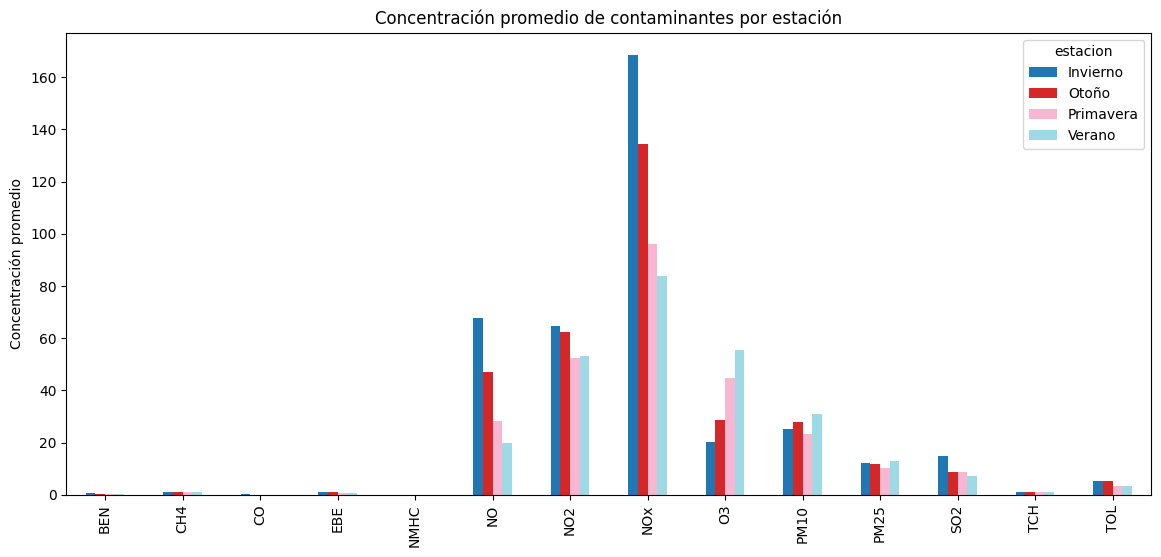

In [19]:
import seaborn as sns

def estacion(mes):
    if mes in [12, 1, 2]:
        return "Invierno"
    elif mes in [6, 7, 8]:
        return "Verano"
    elif mes in [3, 4, 5]:
        return "Primavera"
    else:
        return "Otoño"
    
df["estacion"] = df["month"].apply(estacion)

# Promedio de contaminantes por estación
contaminantes = ["BEN","CH4","CO","EBE","NMHC","NO","NO2","NOx","O3","PM10","PM25","SO2","TCH","TOL"]
promedios_estacion = df.groupby("estacion")[contaminantes].mean()

print(promedios_estacion)

# Visualización (barras)
promedios_estacion.T.plot(kind="bar", figsize=(14,6), colormap="tab20")
plt.ylabel("Concentración promedio")
plt.title("Concentración promedio de contaminantes por estación")
plt.show()

- Correlación: ¿Existe correlación entre los niveles diarios de NO₂ y CO en el periodo analizado?
- Mejora: Analizar correlaciones entre más contaminantes y visualizar la matriz de correlación.

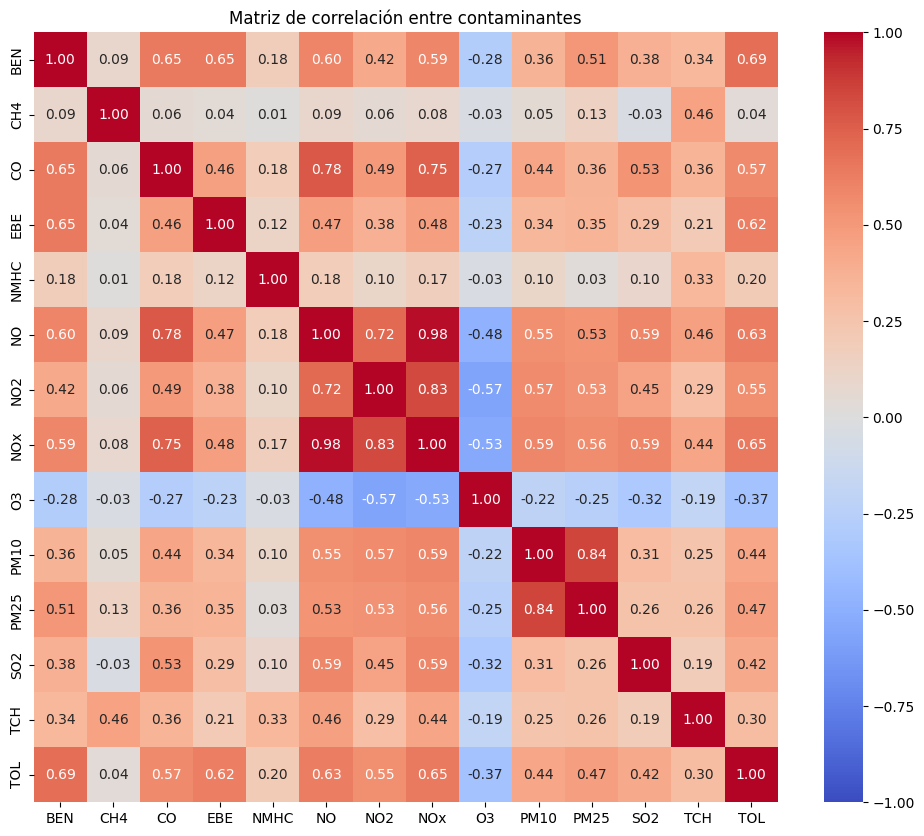

In [20]:
# Correlación entre contaminantes
corr = df[contaminantes].corr()

# Matriz de correlación visual
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de correlación entre contaminantes")
plt.show()

Correlaciones positivas fuertes:

CO y NO (0.78), CO y NOx (0.75), NO y NOx (0.98), NOx y NO2 (0.83)
Esto indica que estos contaminantes provienen de fuentes comunes, muy probablemente tráfico y combustión de vehículos, porque estos gases suelen emitirse juntos.

NOx = NO + NO2, así que la correlación alta entre NO y NOx es esperada.

CO y NO también son típicos de emisiones de motores de combustión interna.

Correlaciones negativas:

O3 vs NO2 (-0.57), O3 vs NOx (-0.53), O3 vs NO (-0.48)
Esto refleja la química atmosférica del ozono urbano:

O₃ se produce por reacción fotoquímica de NO₂ y compuestos orgánicos volátiles (VOCs) bajo luz solar.

Cuando hay mucho NOx, el NO puede reaccionar con O₃ destruyéndolo (efecto titración).

Por eso, en zonas urbanas con tráfico intenso, O₃ tiende a ser menor cuando NO₂ y NOx son altos.

- Laborables vs fines de semana: ¿Hay diferencias en los niveles de NO₂ promedio entre días laborables y fines de semana?
- Mejora: Analizar diferencias para más contaminantes y visualizar la variación semanal.

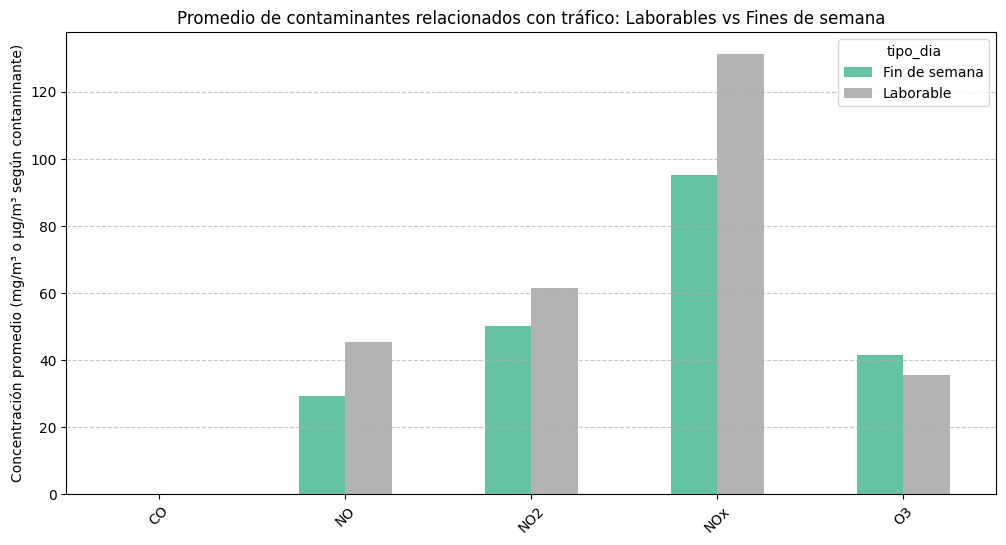

In [21]:
# Contaminantes de interés
contaminantes_trafico = ["CO", "NO", "NO2", "NOx", "O3"]

df["dia_semana"] = df["Time"].dt.weekday
df["tipo_dia"] = df["dia_semana"].apply(lambda x: "Laborable" if x < 5 else "Fin de semana")

# Promedio por tipo de día (laborable vs fin de semana)
promedio_dia = df.groupby("tipo_dia")[contaminantes_trafico].mean()

# Gráfico de barras con colores distintos para cada contaminante
promedio_dia.T.plot(
    kind="bar", 
    figsize=(12,6), 
    colormap="Set2"
)
plt.ylabel("Concentración promedio (mg/m³ o µg/m³ según contaminante)")
plt.title("Promedio de contaminantes relacionados con tráfico: Laborables vs Fines de semana")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Comparar si los gases de tráfico (CO, NO, NO₂, NOx) son más altos en días laborables, como se espera por mayor tráfico.

Observar cómo O₃ se comporta: normalmente puede ser más alto en fines de semana, ya que hay menos NOx que lo titra.

- Variación horaria: ¿A qué horas del día se concentran los picos de NO₂ en promedio durante el año? (curva horaria).
- Mejora: Analizar la variación horaria de más contaminantes y comparar entre años.

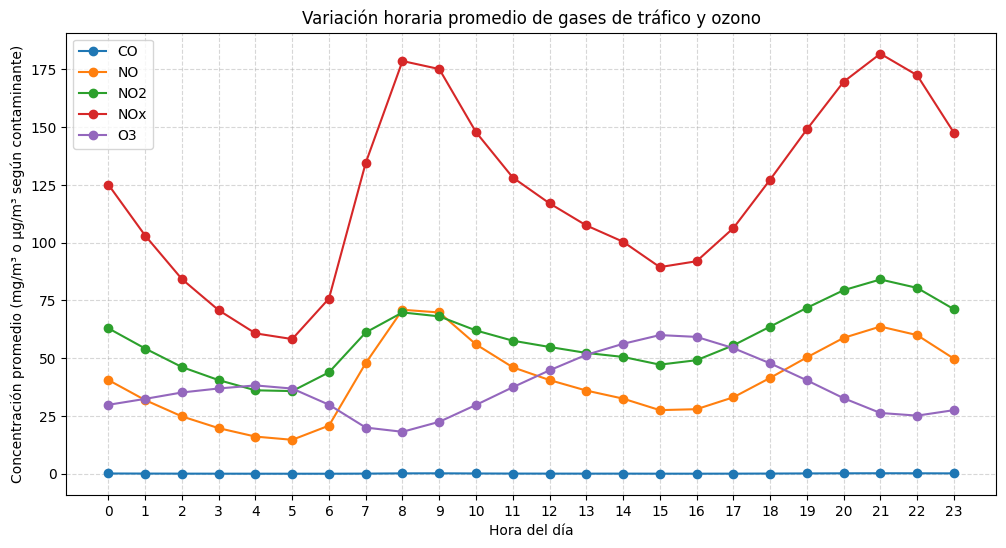

In [24]:
# Contaminantes de interés
contaminantes_trafico = ["CO", "NO", "NO2", "NOx", "O3"]

# Promedio por hora solo de los contaminantes seleccionados
promedio_hora = df.groupby("hour")[contaminantes_trafico].mean()

# Gráfico de líneas con colores distintos
plt.figure(figsize=(12,6))
for gas in contaminantes_trafico:
    plt.plot(promedio_hora.index, promedio_hora[gas], marker='o', label=gas)

plt.xlabel("Hora del día")
plt.ylabel("Concentración promedio (mg/m³ o µg/m³ según contaminante)")
plt.title("Variación horaria promedio de gases de tráfico y ozono")
plt.xticks(range(0,24))
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()


Picos de tráfico:

CO, NO, NO₂ y NOx deberían mostrar picos en horas punta (≈8–9 h y 18–19 h).

Ozono (O₃):

Se espera que alcance su máximo al mediodía, cuando la radiación solar favorece su formación y hay menos NO que lo titra.

Comparación visual:

Permite ver la relación negativa entre O₃ y NOx/NO, que coincide con la correlación negativa que observaste antes.